[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/franckalbinet/mirzai/blob/main/nbs/24_paper.figures.observed_vs_predicted.ipynb)

# 5.2. Observed vs. predicted scatterplots

> Visualizing scatterplots of observed vs. predicted K ex. values for both PLR and CNN models.

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive',  force_remount=False)
    !pip install mirzai
else:
    %load_ext autoreload
    %autoreload 2

In [ ]:
# Python utils
from pathlib import Path
import pickle

from mirzai.vis.core import (centimeter, PRIMARY_COLOR, 
                             set_style, DEFAULT_STYLE)

# Data vis.
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Data science stack
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Input data

To predict exchangeable potassium content with both the PLSR and CNN models, run the following notebooks:
* [PLSR training & evaluation](paper.plsr.train_eval.html)
* [CNN training & evaluation](paper.cnn.train_eval.html)

Instead, we load already predicted and saved values.

In [ ]:
src_dir = Path('dumps')
y_hat_plsr, y_true_plsr = pickle.load(open(src_dir/'predicted-true-plsr-seed-1.pickle', "rb"))
y_hat_cnn, y_true_cnn = pickle.load(open(src_dir/'predicted-true-cnn-seed-1.pickle', "rb"))
print(f'y_hat_plsr shape: {y_hat_plsr.shape}, y_hat_cnn shape: {y_hat_cnn.shape}')

y_hat_plsr shape: (4014,), y_hat_cnn shape: (4014,)


## Plot

In [ ]:
def plot_hexbin_scatter(x, Y, ax=None, hb_kwargs={}):
    if ax is None:
        ax = plt.gca()
    hb = ax.hexbin(x, Y, **hb_kwargs)
    ax.set_aspect('equal')
    return (ax, hb)

def get_color_norm(x, Y, ax, n_bins=5, hb_kwargs={}):
    hb = ax.hexbin(x, Y, cmap='viridis', **hb_kwargs)
    bounds = np.rint(np.histogram_bin_edges(hb.get_array(), n_bins))
    bounds[0] = bounds[0] + 1
    norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=n_bins+1, extend='min')
    return norm

def plot_obs_vs_pred(data_plsr, data_cnn,
                     gridsize=35, 
                     figsize=(16*centimeter,8*centimeter), 
                     dpi=600):
    # Styles
    p = plt.rcParams
    p["grid.color"] = "0.65"
    p["grid.linewidth"] = 0.4

    # Layout 
    fig = plt.figure(figsize=figsize, dpi=dpi)
    nrows, ncols = 1, 3
    w1, w2, w3 = 20, 20, 2
    gs = GridSpec(nrows=nrows, ncols=ncols, figure=fig, width_ratios=[w1, w2, w3])
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.set_title('(a)', loc='left')
    ax1 = fig.add_subplot(gs[0, 1]) 
    ax1.set_title('(b)', loc='left')

    # color norm based on cnn perfs
    params_hb = {'gridsize': gridsize, 'mincnt': 1, 'alpha': 0}
    x, Y = data_cnn
    norm = get_color_norm(x, Y, ax1, hb_kwargs=params_hb)

    # Calculate color scale adapted to grid resolution
    for ax, (x, Y) in zip([ax0, ax1], [data_plsr, data_cnn]):
        params_hb = {'gridsize': gridsize, 'cmap': cm.get_cmap('Spectral_r', norm.N), 
                    'mincnt': 1, 'norm': norm, 'linewidths': 0.2}
        _, hb = plot_hexbin_scatter(x, Y, ax=ax, hb_kwargs=params_hb)
        ax.plot([-1.25, 1.25], [-1.25, 1.25], 'k--', lw=0.75)

    ax_clb = plt.subplot(gs[0, 2], aspect=w1)
    ax_clb
    p["xtick.direction"] = "out"
    clb = plt.colorbar(hb, cax=ax_clb)
    clb.ax.tick_params(axis='y', direction='out')
    clb.ax.set_title('Counts', size=8)

    # Ornaments
    ax0.set_ylabel('Observed ex-K ($log_{10}(cmol(+)kg^{-1})$) →', loc='top')
    ax0.set_xlabel('Predicted ex-K ($log_{10}(cmol(+)kg^{-1})$) →', loc='right')
    ax1.set_xlabel('Predicted ex-K ($log_{10}(cmol(+)kg^{-1})$) →', loc='right')

    plt.tight_layout()

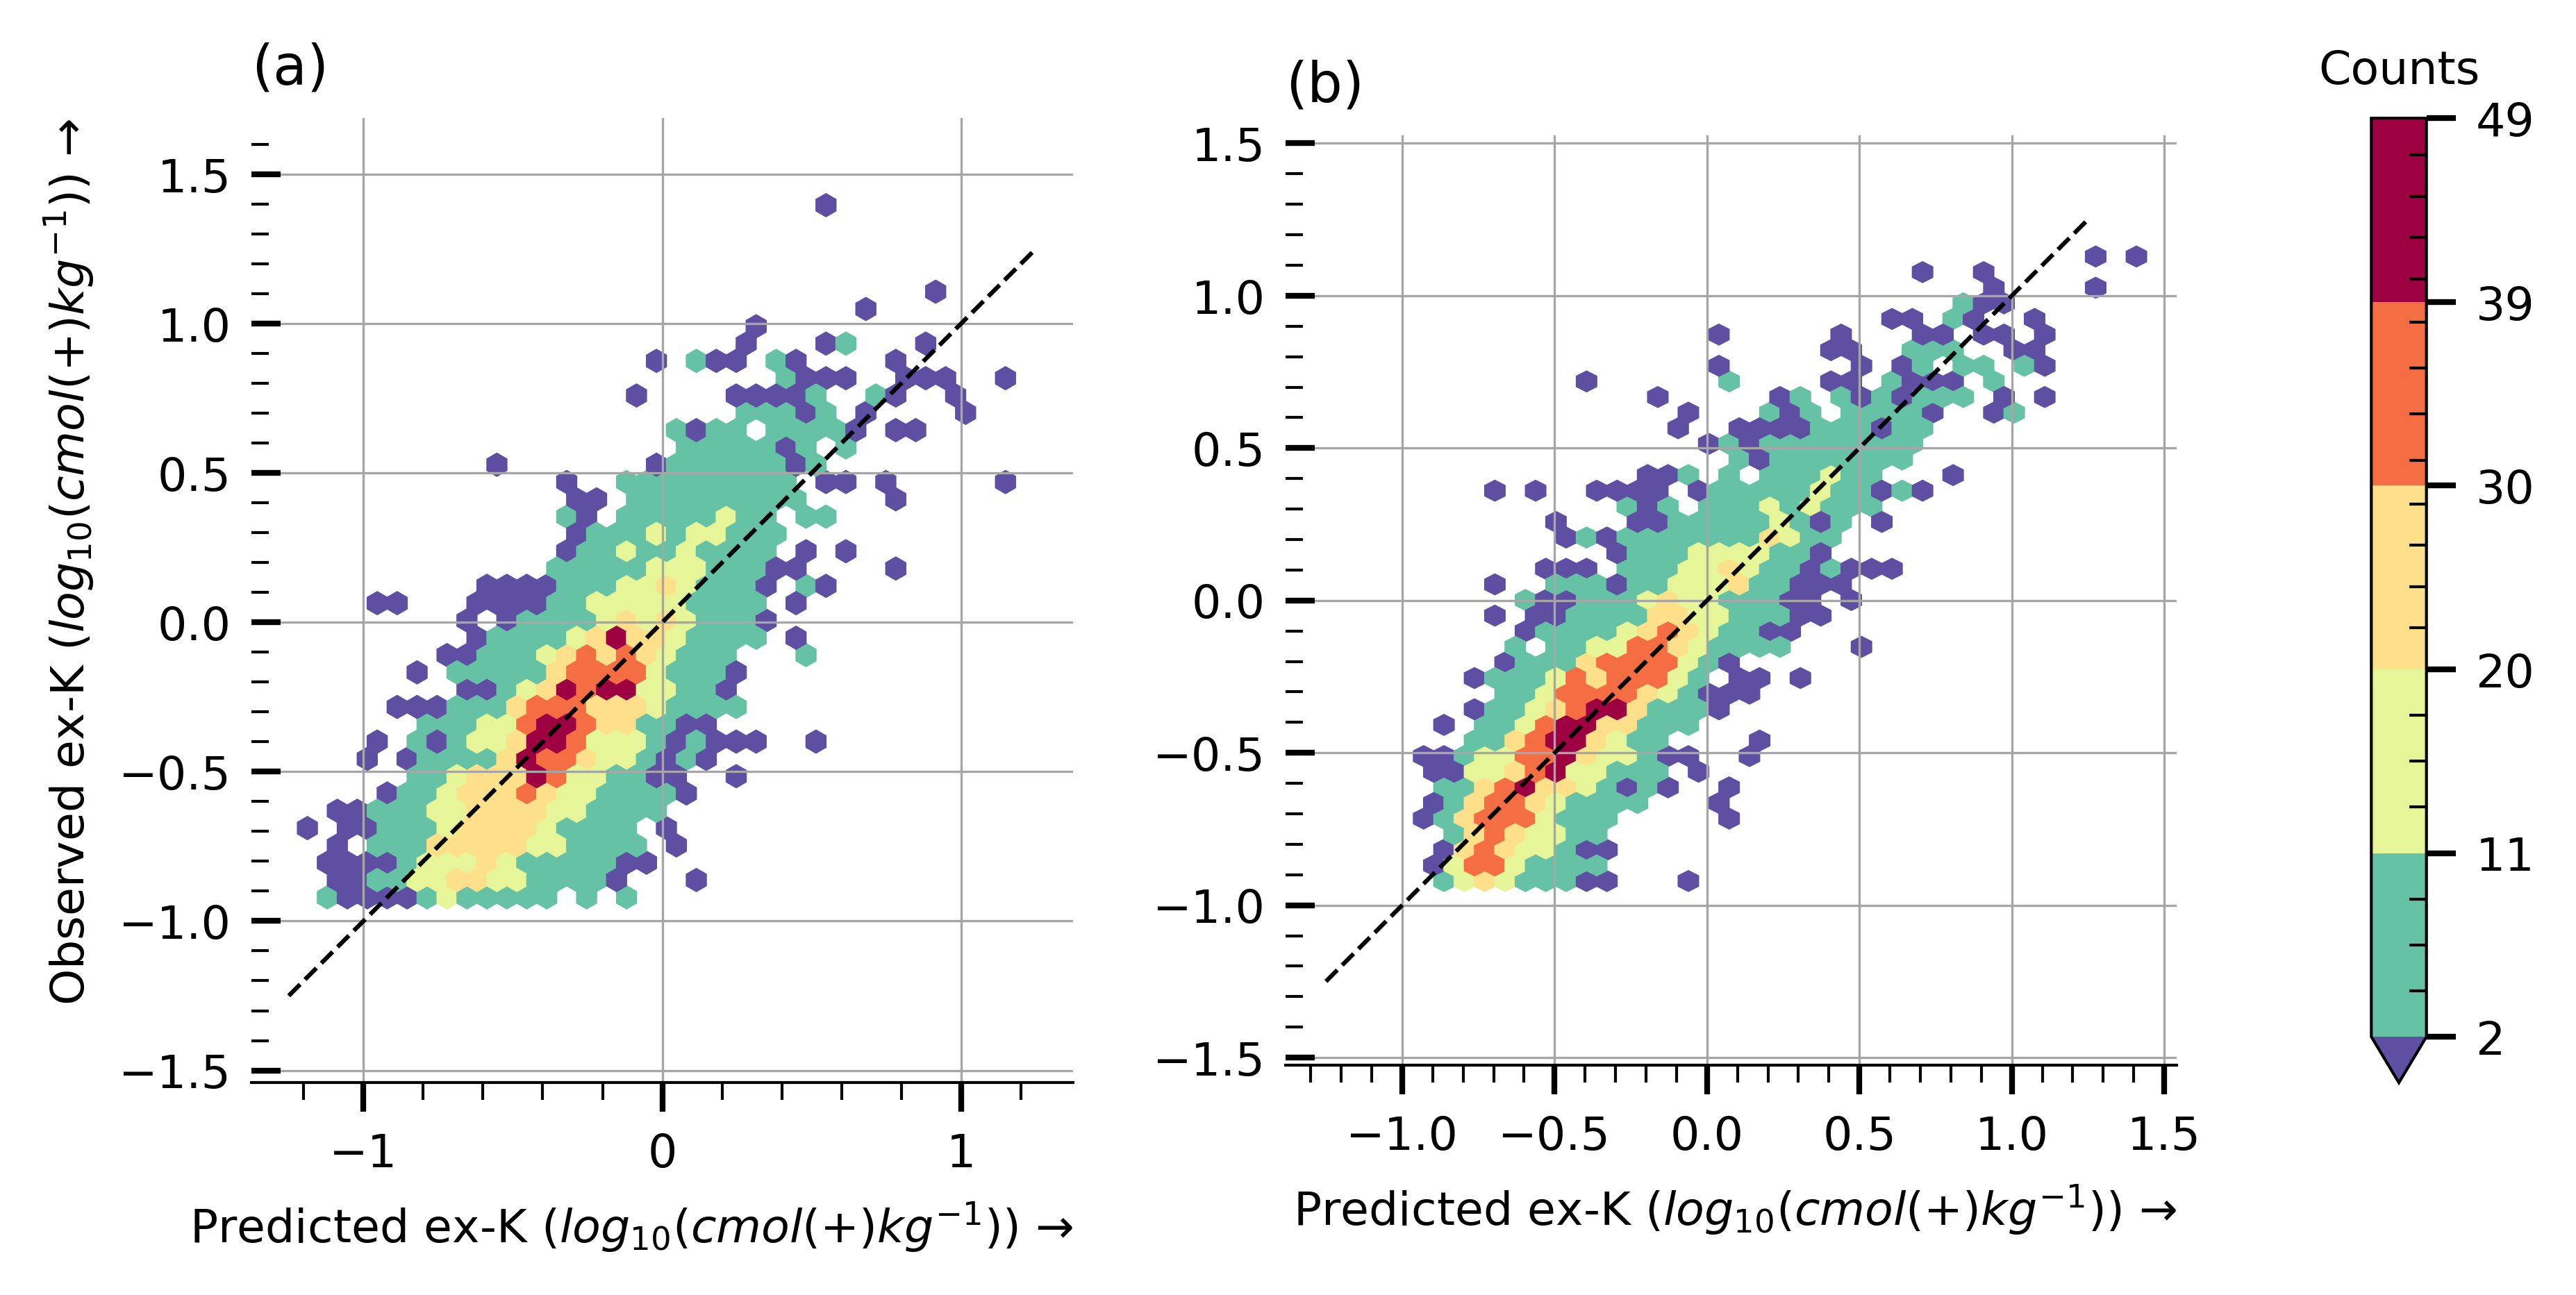

In [ ]:
#FIG_PATH = Path('nameofyourfolder')
FIG_PATH = Path('images/')
set_style(DEFAULT_STYLE)
plot_obs_vs_pred((y_hat_plsr, y_true_plsr), (y_hat_cnn, y_true_cnn))

# To save/export it
plt.savefig(FIG_PATH/'observed-vs-predicted.png', dpi=600, transparent=True, format='png')